In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [3]:
image=cv2.imread('plot2.png')
cv2.imwrite('plot2.jpeg',image)

True

In [4]:
# getting all axis with using the most-connected-components
def get_all_axis(img):#Horizontal:
  #Check if img is gray or not
  #if it is RGB :
  if(len(img.shape)==3):
    gray_image=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  else: #img is gray
    gray_image = img
  negative_image = cv2.bitwise_not(gray_image)
  binary_image = cv2.adaptiveThreshold(negative_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                            cv2.THRESH_BINARY, 15, -2)
  cols = binary_image.shape[1]
  print(np.count_nonzero(binary_image==1))

  horizontal_size = cols // 30
  horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
  horizontal = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, horizontalStructure)
  rows = gray_image.shape[0]
  verticalsize = rows // 10
  # Create structure element for extracting vertical lines through morphology operations
  verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, verticalsize))
  vertical = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, verticalStructure)

  temp=cv2.bitwise_or(vertical,horizontal)
  #plt.axis('off')
  #plt.imshow(temp,cmap='binary')
  cv2.imwrite("test.jpeg",temp)

  return temp

In [5]:
def most_connected_component(img):# a GrayScale image

  _, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
  num_labels, labels = cv2.connectedComponents(img)

  # Calculate the area of each component
  component_sizes = np.bincount(labels.flatten())

  # Find the label of the largest component (excluding background label)
  largest_component_label = np.argmax(component_sizes[0:]) + 1

  # Create a mask for the largest component
  largest_component_mask = (labels == largest_component_label).astype(np.uint8) * 255

  # Apply the mask to the original image
  largest_component_img = cv2.bitwise_and(img, img, mask=largest_component_mask)
  cv2.imwrite("axis.jpeg",largest_component_img)

  # Display the result
  #plt.figure(figsize=[10, 8])
  #plt.subplot(131); plt.imshow(img, cmap='gray'); plt.title("Original")
  #plt.subplot(132); plt.imshow(largest_component_mask, cmap='gray'); plt.title("Largest Component Mask")
  #plt.subplot(133); plt.imshow(largest_component_img, cmap='gray'); plt.title("Largest Component Image")
  #plt.show()
  return(largest_component_img)

In [43]:
def Left_most_connected_component(img):
  """
  it reads  an  image, then we check the dimension , if it is an grayscale image,
  then we find all of the connected components and after that we find the LeftMost component
  """
  if (len(img.shape  ) ==3): # it means that the image is not rgb
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  else :
   # _, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    num_labels, labels = cv2.connectedComponents(img)
    min=np.inf
    index=0
    for i in range((num_labels)):
      component_mask=(labels == np.argmax(sizes[i:]) + 1)
      x = [subarray[0] for subarray in (np.argwhere(((component_mask==1))))]# Height
      y =[subarray[1] for subarray in (np.argwhere(((component_mask==1))))]# Width
      if (sorted(y)[0]<min)  :# finding the left most y :
        min=sorted(y)[0]
        index=i
      left_most_component_mask=(labels == np.argmax(sizes[index:]) + 1)

    return (left_most_component_mask)

In [32]:
img.shape

(420, 560)

In [42]:
if(len(axis.shape)) ==

2

0


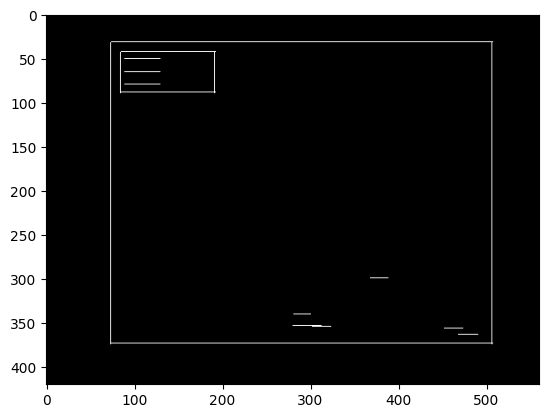

In [46]:
img=cv2.imread('plot3.png',0)# Reading the original image
axis=get_all_axis(img)
asd=Left_most_connected_component(axis)
plt.imshow(axis,cmap='gray')

0


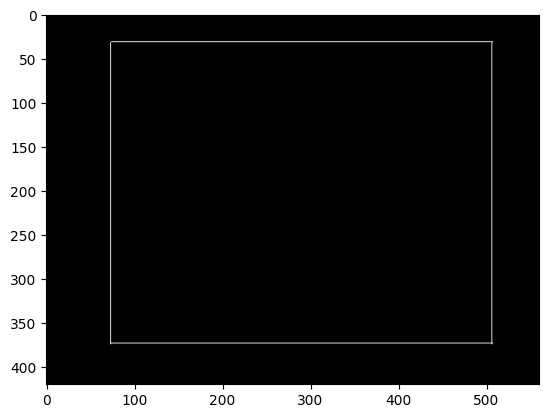

In [45]:
#________________________________________ Good ______________________
img=cv2.imread('plot3.png',0)# Reading the original image
axis=get_all_axis(img)
asd=Left_most_connected_component(axis)
plt.imshow(asd,cmap='gray')

In [16]:
img=cv2.imread('plot3.png')# Reading the original image
z=get_all_axis(img)
Axis_image=cv2.imread("test.jpeg",0)# reading the Axis image
Axis_component=most_connected_component(Axis_image)

0


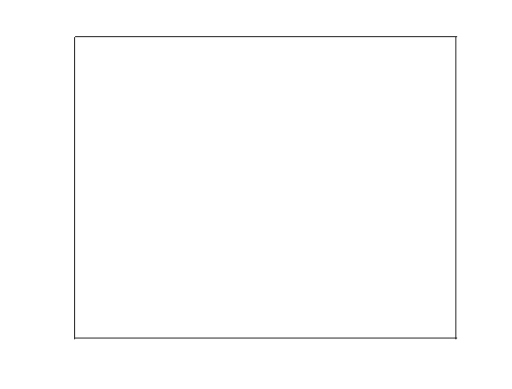

In [17]:
plt.axis('off')
plt.imshow(Axis_component,cmap='binary')

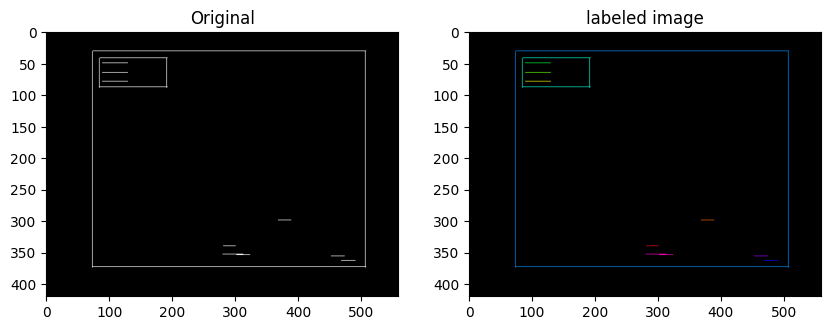

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread("test.jpeg", 0)
_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
num_labels, labels = cv2.connectedComponents(img)

# Map component labels to hue val, 0-179 is the hue range in OpenCV
label_hue = np.uint8(179*labels/np.max(labels))
blank = np.ones_like(img) * 255
labeled_img = cv2.merge([label_hue, blank, blank])

# Converting cvt to BGR
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0


plt.figure(figsize=[10,8])
plt.subplot(121);plt.imshow(img, cmap='gray');plt.title("Original");
plt.subplot(122);plt.imshow(labeled_img, cmap='gray');plt.title("labeled image");

319

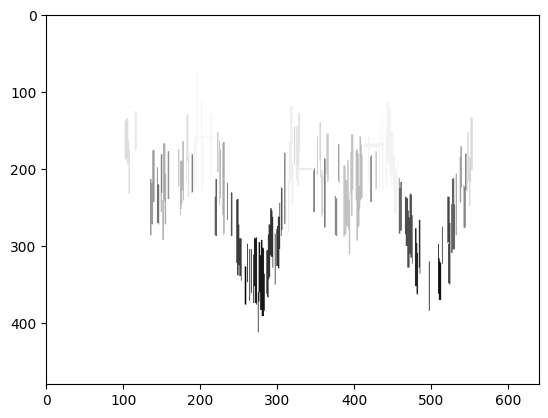

In [ ]:
plt.imshow(labels,cmap='binary')

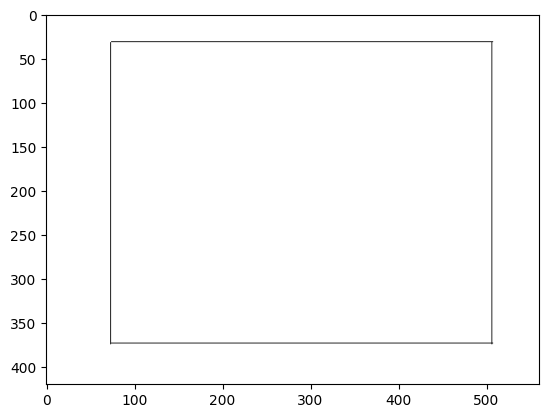

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread("test.jpeg", 0)
_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
num_labels, labels = cv2.connectedComponents(img)

# Find the size of each connected component
sizes = np.bincount(labels.flatten())

# Find the label of the largest connected component
largest_label = np.argmax(sizes[0:]) + 1  # Ignore the background label (0)

# Create a binary mask for the largest connected component
largest_component_mask = (labels == largest_label).astype(np.uint8) * 255
max=0
for i in range(len(sizes)):
  """ Looping through each connected component and finding the one with
  the most average => hope that is the axis
"""
  largest_component_mask = (labels == np.argmax(sizes[i:]) + 1).astype(np.uint8) * 255
  plt.imshow(largest_component_mask,cmap='binary')
  # if np.mean(largest_component_mask)>max:
        # max=i

# largest_component_mask= (labels == np.argmax(sizes[max:]) + 1).astype(np.uint8) * 255

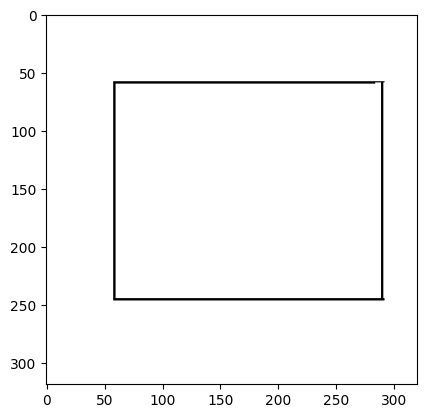

In [ ]:
largest_component_mask = (labels == np.argmax(sizes[1:]) + 1).astype(np.uint8) * 255
plt.imshow(largest_component_mask,cmap='binary')


In [ ]:
(np.argwhere(((lcm==1))))

In [ ]:
cv2.imwrite('largest_component_mask.jpeg',largest_component_mask)

True

In [ ]:
lcm=cv2.imread("largest_component_mask.jpeg",0)

True

In [ ]:
x = [subarray[0] for subarray in (np.argwhere(((lcm==1))))]# Height
y =[subarray[1] for subarray in (np.argwhere(((lcm==1))))]# Width
# then we need to loop through each components then find the one with the Minimum Y

In [ ]:
len(labels)

319

In [20]:
min=np.inf
index=0
for i in range((num_labels)):
  component_mask=(labels == np.argmax(sizes[i:]) + 1)
  x = [subarray[0] for subarray in (np.argwhere(((component_mask==1))))]# Height
  y =[subarray[1] for subarray in (np.argwhere(((component_mask==1))))]# Width
  if (sorted(y)[0]<min)  :# finding the left most y :
    min=sorted(y)[0]
    index=i

In [21]:
min,index

(73, 0)

In [26]:
np.count_nonzero(component_mask==True)

1553

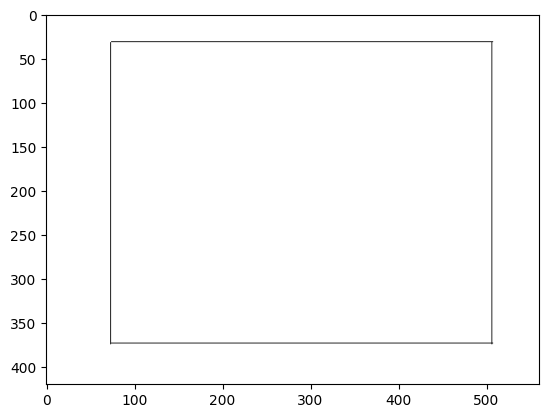

In [22]:
component_mask=(labels == np.argmax(sizes[index:]) + 1)
plt.imshow(component_mask,cmap='binary')

In [ ]:
index

0

In [ ]:
(np.argwhere(((lcm==1))))

array([[ 56,  56],
       [ 56,  60],
       [ 56,  61],
       [ 56, 281],
       [ 56, 291],
       [ 56, 293],
       [ 57, 286],
       [ 57, 288],
       [ 57, 289],
       [ 58,  57],
       [ 59, 287],
       [ 59, 294],
       [ 60, 280],
       [ 60, 281],
       [ 60, 284],
       [ 60, 291],
       [ 60, 293],
       [ 61, 288],
       [ 61, 291],
       [ 61, 294],
       [ 62,  56],
       [ 62, 280],
       [ 62, 284],
       [ 62, 286],
       [ 62, 288],
       [ 62, 292],
       [ 63,  56],
       [ 63, 281],
       [ 64, 292],
       [ 65, 292],
       [ 66, 292],
       [ 67, 292],
       [ 68, 292],
       [ 69, 292],
       [ 70, 292],
       [ 71, 292],
       [ 72, 292],
       [ 73, 292],
       [ 74, 292],
       [ 75, 292],
       [ 76, 292],
       [ 77, 292],
       [ 78, 292],
       [ 79, 292],
       [ 80, 292],
       [ 81, 292],
       [ 82, 292],
       [ 83, 292],
       [ 84, 292],
       [ 85, 292],
       [ 86, 292],
       [ 87, 292],
       [ 88,

In [ ]:
np.count_nonzero(comp==1)

222

In [ ]:
np.argwhere(labels == np.argmax(sizes[2:]))

array([[  0,   0],
       [  0,   1],
       [  0,   2],
       ...,
       [318, 317],
       [318, 318],
       [318, 319]])

In [ ]:
largest_component_mask.shape

(319, 320)

In [ ]:
len(np.argwhere(largest_component_mask))

1670

In [ ]:
largest_label = np.argmax(sizes[0:]) + 1  # Ignore the background label (0)
largest_label2 = np.argmax(sizes[1:]) + 1  # Ignore the background label (0)
largest_label,largest_label2,np.argmax(sizes[2:]) + 1,np.argmax(sizes[3:]) + 1

(1, 2, 1, 3)

In [ ]:
np.argmax(sizes)

0

In [ ]:
largest_component_mask = (labels == np.argmax(sizes[1:]) + 1).astype(np.uint8) * 255
np.mean(largest_component_mask)

4.171728056426332

In [ ]:
sizes

array([100290,     10,   1670,     12,     11,     28,     13,     13,
           10,     10,     13])

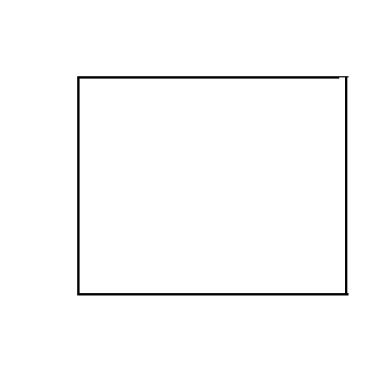

In [ ]:
plt.axis('off')
plt.imshow(largest_component_mask,cmap='binary')

In [ ]:
np.mean(largest_component_mask)

4.171728056426332

In [ ]:
max=0
for i in range(len(sizes)):
  """ Looping through each connected component and finding the one with
  the most average => hope that is the axis
"""
  largest_component_mask = (labels == np.argmax(sizes[i:]) + 1).astype(np.uint8) * 255
  if np.mean(largest_component_mask)>max:
        max=i
        print(np.mean(largest_component_mask))
max

0.02498040752351097
4.171728056426332
4.171728056426332
4.171728056426332


9

In [ ]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [ ]:
max

7

In [ ]:
len(sizes)

43